# Load the raw data
This dataset is compiled by Johns Hopkins University and updated daily
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Here I forked their repository and use this app (https://github.com/apps/pull) to keep the forked repo updated.

In this notebook, I look at the global data only. For US data, see EDA_US.

In [1]:
import pandas as pd 
import os
import numpy as np
import plotly.graph_objects as go
import plotly
import plotly.express as px
import plotly.io as pio
from IPython.display import Image

# Load data
print('Beginning data loading ...')

# Data directory
dir_parent = os.path.dirname(os.getcwd())
dir_data = os.path.join(dir_parent, 'COVID-19/csse_covid_19_data/csse_covid_19_time_series')

# Global case 
dir_global = os.path.join(dir_data, 'time_series_covid19_confirmed_global.csv')
global_case = pd.read_csv(dir_global)

# Global death
dir_global_death = os.path.join(dir_data, 'time_series_covid19_deaths_global.csv')
global_death = pd.read_csv(dir_global_death)
    
print('Data loading finished!')

Beginning data loading ...
Data loading finished!


# Explore and analyze confirmed cases

## Explore the data structure and basic information

In [2]:
# Let's look at a few rows
global_case.head(n=2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842


In [3]:
# Rename feature Country/Region to Country to avoid headache later
global_case.rename(columns={'Country/Region': 'Country'}, inplace=True)
global_case.head(n=2)

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842


In [4]:
# Basic information
unique_country_name = list(global_case['Country'].unique())
n_country = len(unique_country_name)
column_name = list(global_case.keys())
date_string = column_name[4:]
n_day = len(date_string)
print("Number of countries: " + str(n_country))
print("Number of recorded days: " + str(n_day))

Number of countries: 187
Number of recorded days: 107


In [5]:
# Collapse across countries 
global_case_collapse_country = global_case.groupby('Country').sum().reset_index()
global_case_collapse_country.head(n=2)

,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,750,766,773,782,789,795,803,820,832,842


## Look at top-15 countries with the most number of cases

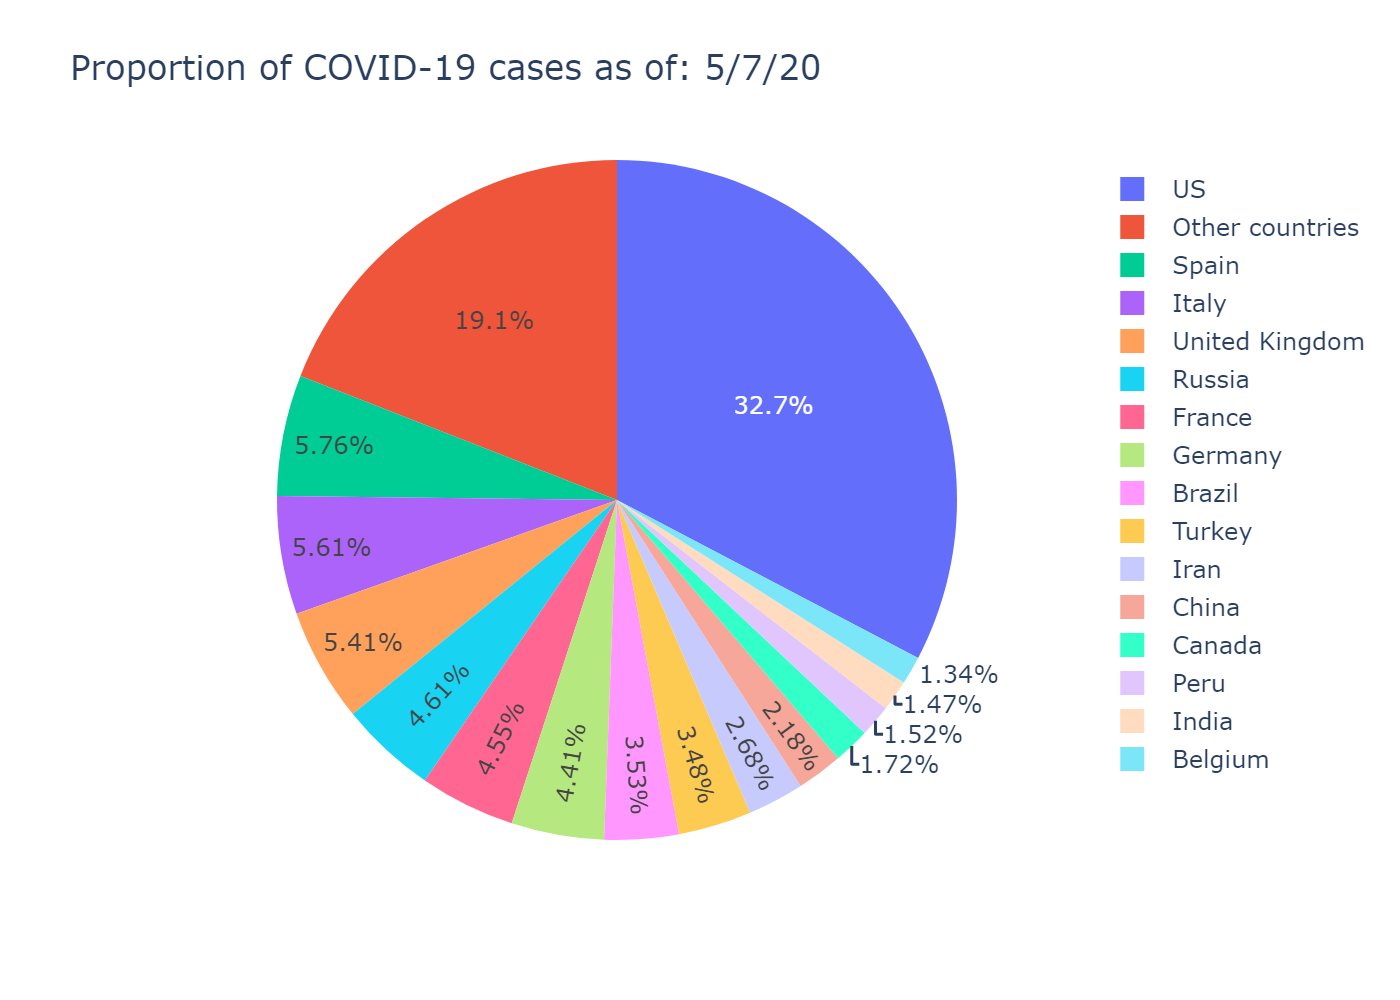

In [6]:
# Select top-15 countries and aggregate all other countries
top_country = global_case_collapse_country.nlargest(15, date_string[-1])
country_collapse_bottom = global_case_collapse_country.copy()
country_collapse_bottom.loc[country_collapse_bottom[date_string[-1]] < top_country[date_string[-1]].min(),
                            'Country'] = 'Other countries'


# Pie chart
fig = px.pie(country_collapse_bottom, values=date_string[-1], names='Country',
             title='Proportion of COVID-19 cases as of: ' + date_string[-1])

margin_size = 80
fig.update_layout(margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size))

# Interactive plot
# fig.show()

# Static plot (to show the figures on Github, I have to convert to static image)
# For interactive plot, use the interactive plot above
Image(pio.to_image(fig, format='png', scale=2))

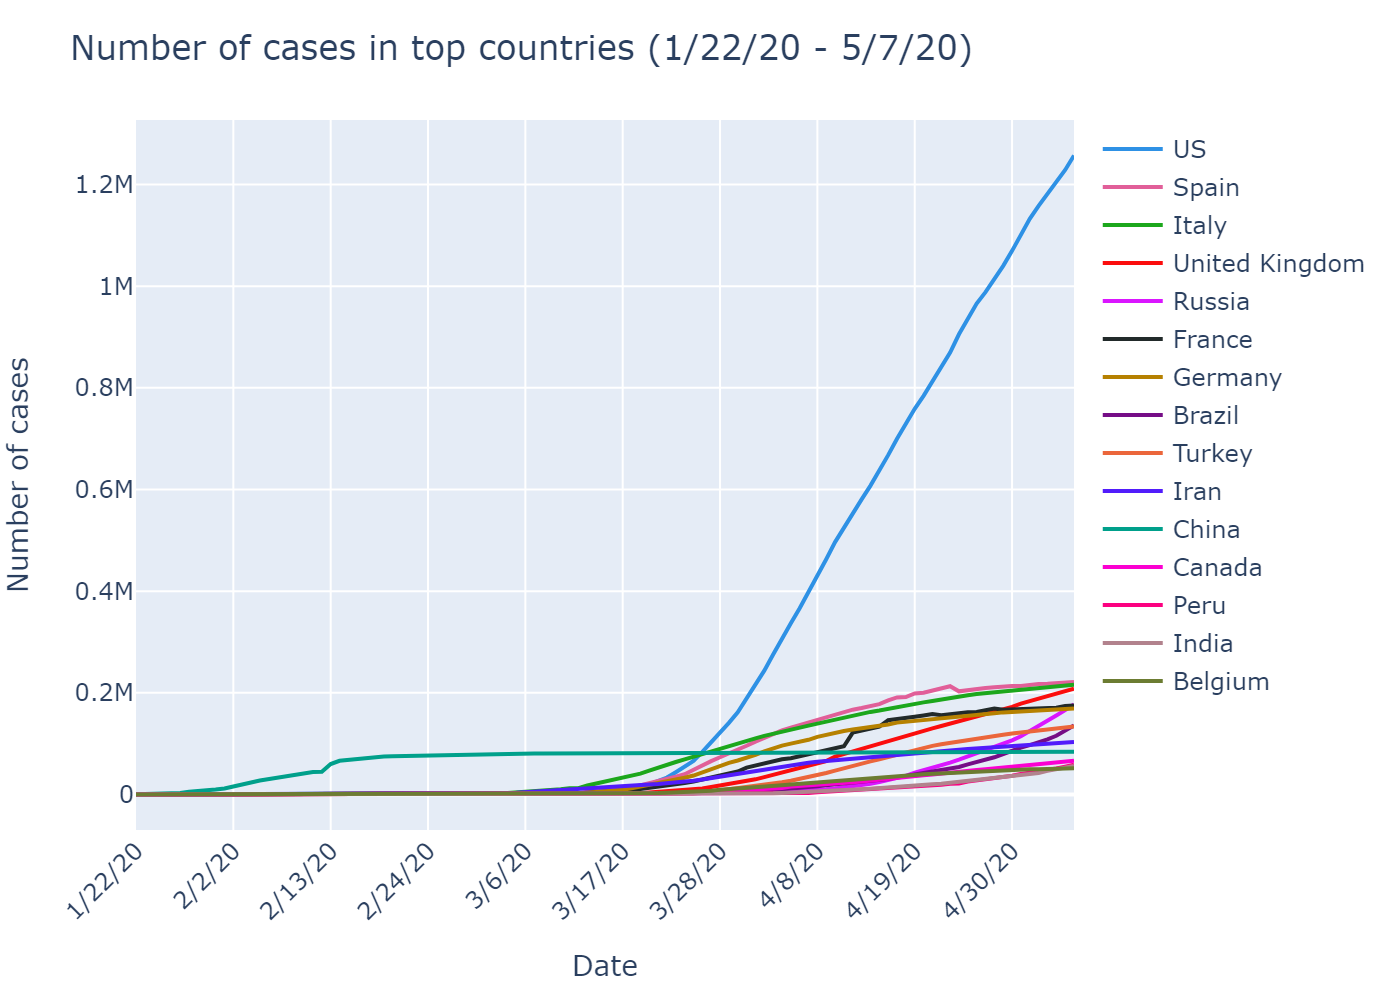

In [7]:
# Now let's look at the number of case across time for top countries
name_top_country = top_country['Country']
matrix_num_case = top_country.drop(columns=['Country', 'Lat', 'Long']).to_numpy()

# Plot the number of cases
fig = go.Figure()
color_values = plotly.colors.qualitative.Dark24
for index, country in enumerate(name_top_country):
    fig.add_trace(go.Scatter(x=date_string, y=matrix_num_case[index, :], name=country,
                             line=dict(color=color_values[index])))
    
margin_size = 60
fig.update_layout(title='Number of cases in top countries (' + date_string[0] + ' - ' + date_string[-1] + ')',
                   xaxis_title='Date',
                   yaxis_title='Number of cases',
                 margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size), height=500)
fig.update_xaxes(tickangle=-45, nticks=10)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Look at bottom-15 countries with the least number of cases

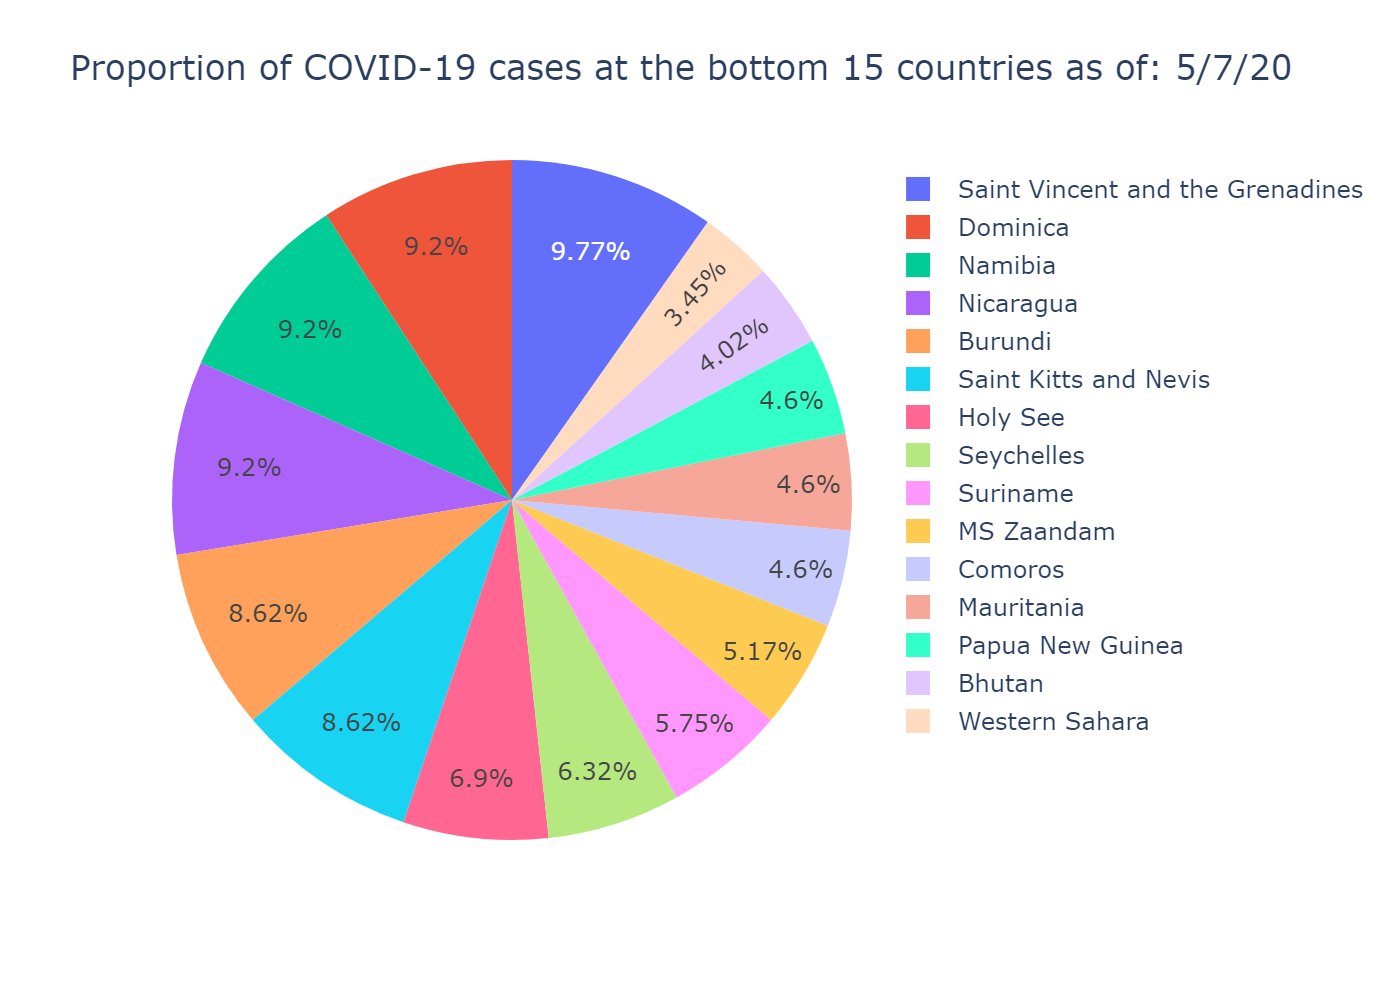

In [8]:
# Display the countries with the least number of cases
bottom_country = global_case_collapse_country.nsmallest(15, column_name[-1])
fig = px.pie(bottom_country, values=column_name[-1], names='Country',
             title='Proportion of COVID-19 cases at the bottom 15 countries as of: ' + column_name[-1])

margin_size = 80
fig.update_layout(margin=dict(l=margin_size, r=margin_size, t=margin_size, b=margin_size))

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

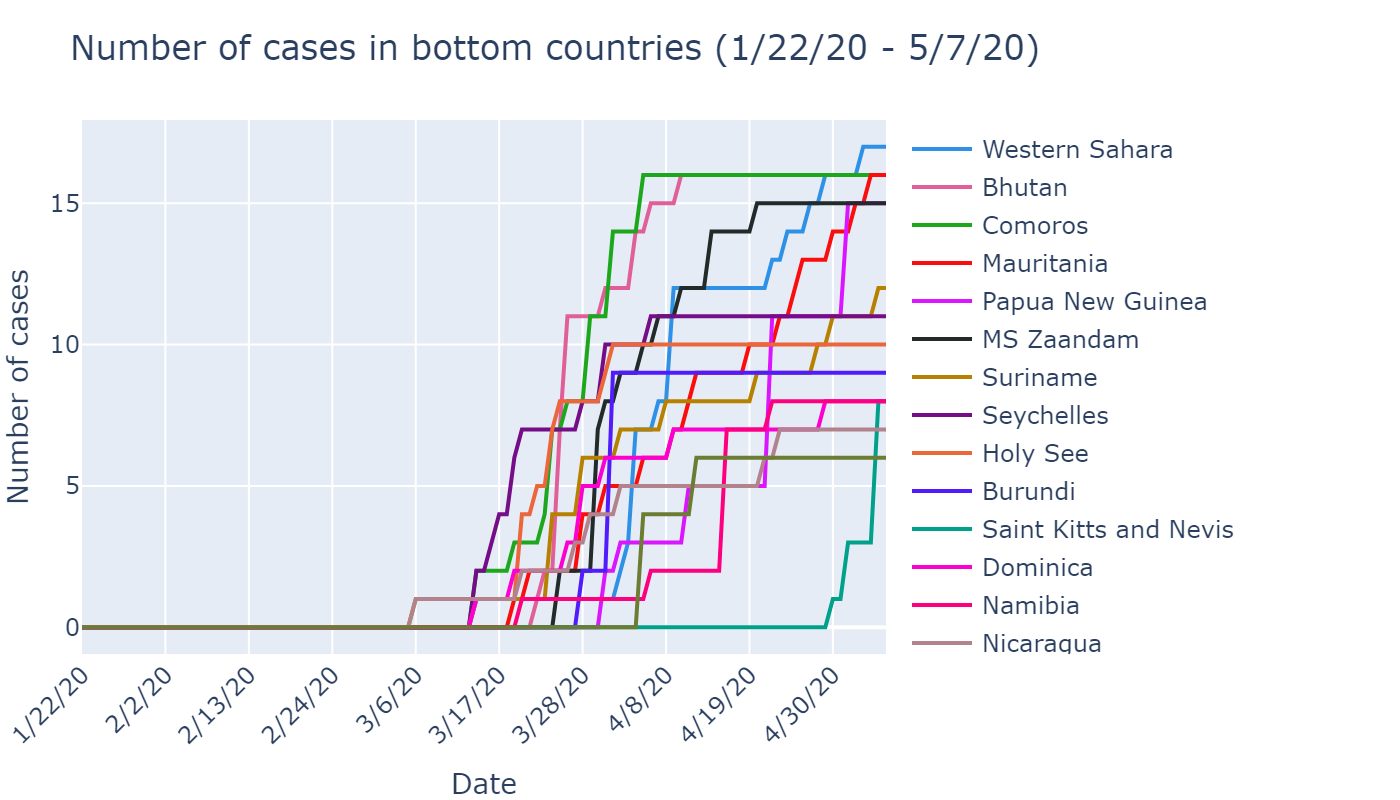

In [9]:
# Now let's look at the number of case across time for bottom countries
name_bottom_country = bottom_country['Country']
bottom_country.sort_values(by=[date_string[-1]], ascending=False, inplace=True)
matrix_num_case = bottom_country.drop(columns=['Country', 'Lat', 'Long']).to_numpy()

# Plot the number of cases
fig = go.Figure()
color_values = plotly.colors.qualitative.Dark24
for index, country in enumerate(name_bottom_country):
    fig.add_trace(go.Scatter(x=date_string, y=matrix_num_case[index, :], name=country,
                             line=dict(color=color_values[index])))

margin_size = 60
fig.update_layout(title='Number of cases in bottom countries (' + date_string[0] + ' - ' + date_string[-1] + ')',
                   xaxis_title='Date',
                   yaxis_title='Number of cases',
                 margin=dict(l=0, r=0, t=margin_size, b=margin_size), height=400)

fig.update_xaxes(tickangle=-45, nticks=10)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Something more fancy: number of cases on world map

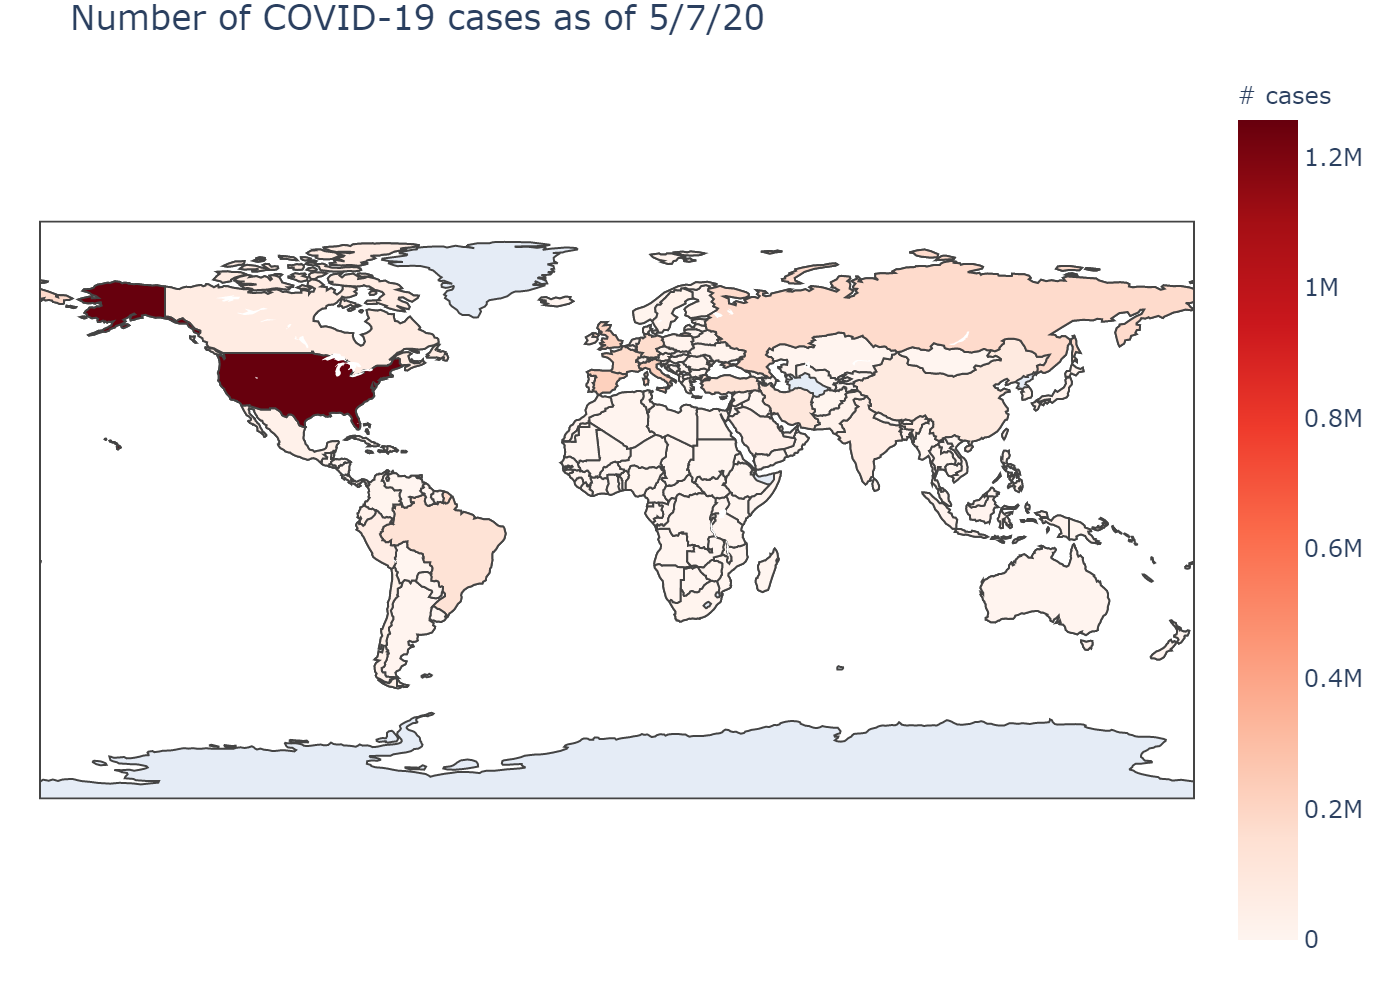

In [10]:
# Use plotly Choropleth built-in map
fig = go.Figure(data=go.Choropleth(
    locations=global_case_collapse_country["Country"], # Country names
    locationmode = 'country names', # set the mode to country name
    z = global_case_collapse_country[date_string[-1]].astype(float), # Data to be color-coded
    colorscale = 'Reds',
    colorbar_title = "# cases",
))

fig.update_layout(
    title_text = 'Number of COVID-19 cases as of ' + date_string[-1],
    margin=dict(l=20, r=20, t=30, b=20)
)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

It seems like US is a big outlier (American exceptionalism!) so we effectively cannot see any other country. So let's try to exclude US and see the world map again.

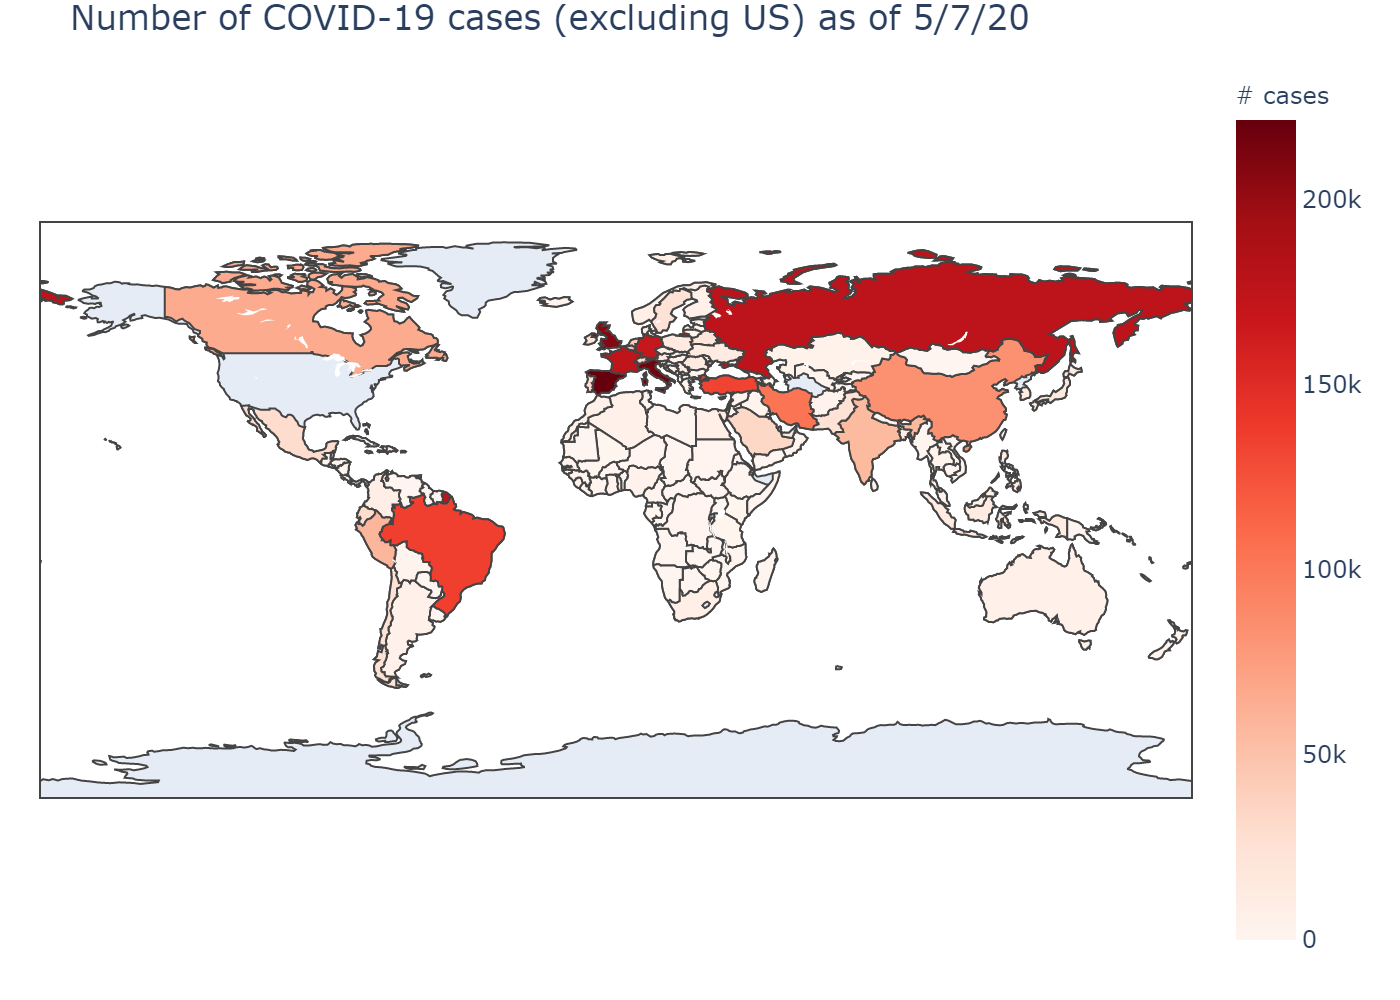

In [11]:
# Exclude US
global_case_collapse_country_excludeUS = global_case_collapse_country[global_case_collapse_country.Country != 'US']

fig = go.Figure(data=go.Choropleth(
    locations=global_case_collapse_country_excludeUS["Country"], # Country names
    locationmode = 'country names', # set the mode to country name
    z = global_case_collapse_country_excludeUS[date_string[-1]].astype(float), # Data to be color-coded
    colorscale = 'Reds',
    colorbar_title = "# cases",
))

fig.update_layout(
    title_text = 'Number of COVID-19 cases (excluding US) as of ' + date_string[-1],
    margin=dict(l=20, r=20, t=30, b=20)
)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

## Explore relation between number of cases and countries' features

### Latitude and Longitude

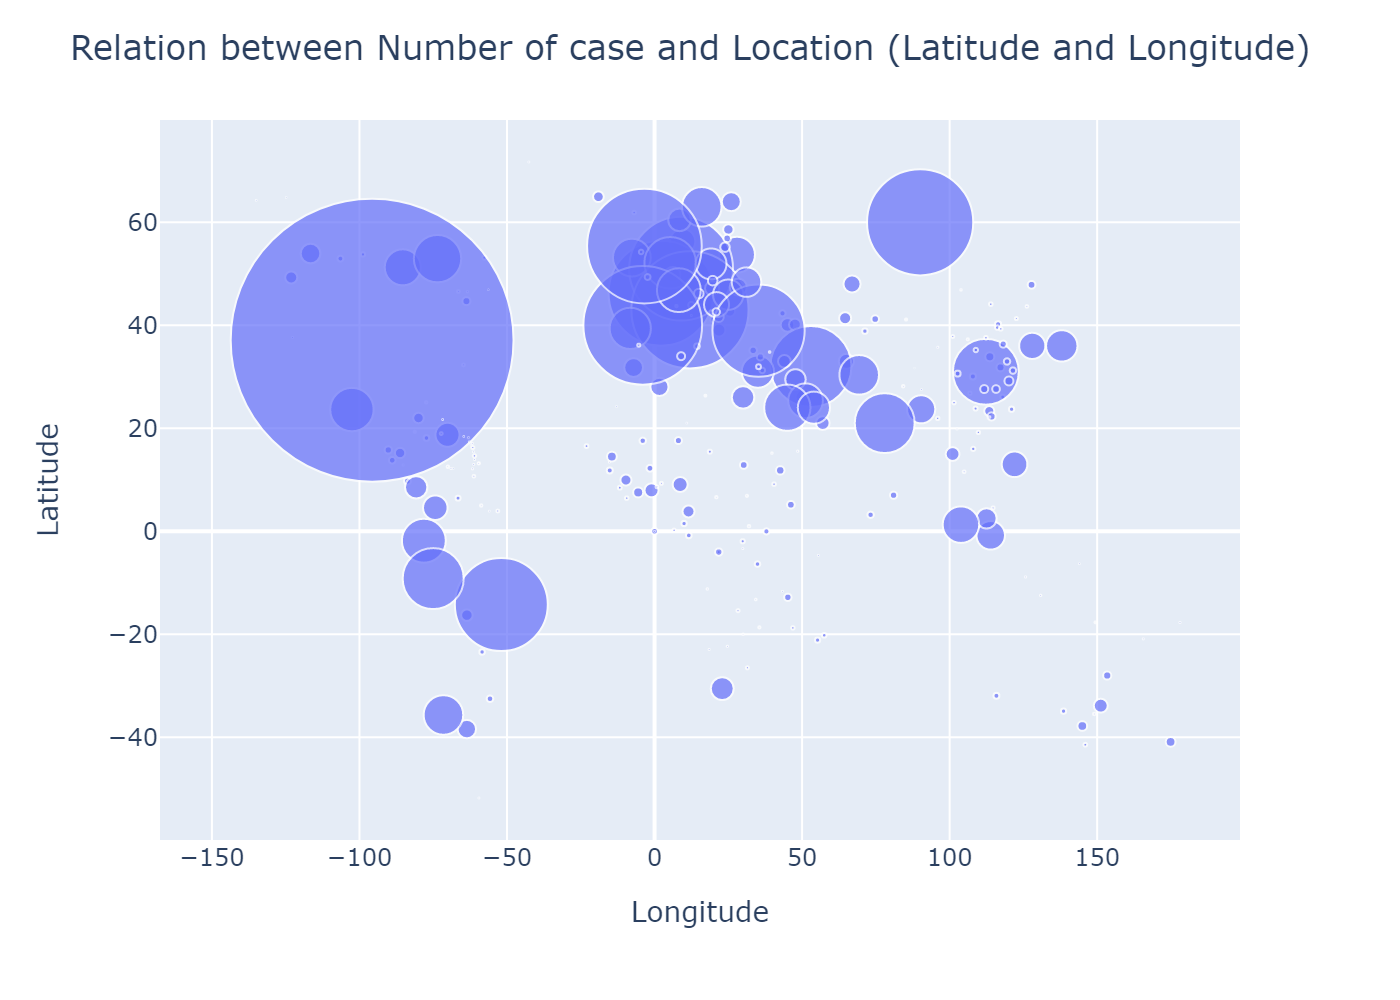

In [12]:
# Let's try bubble plot (it's similar to the world map above but instead of heatmap, 
# we use bubble size to indicate number of cases)
fig = px.scatter(global_case, x="Long", y="Lat",
                 size=date_string[-1], hover_name="Country", size_max=100)

fig.update_layout(
    title='Relation between Number of case and Location (Latitude and Longitude)',
    xaxis=dict(title='Longitude'),
    yaxis=dict(title='Latitude')
)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

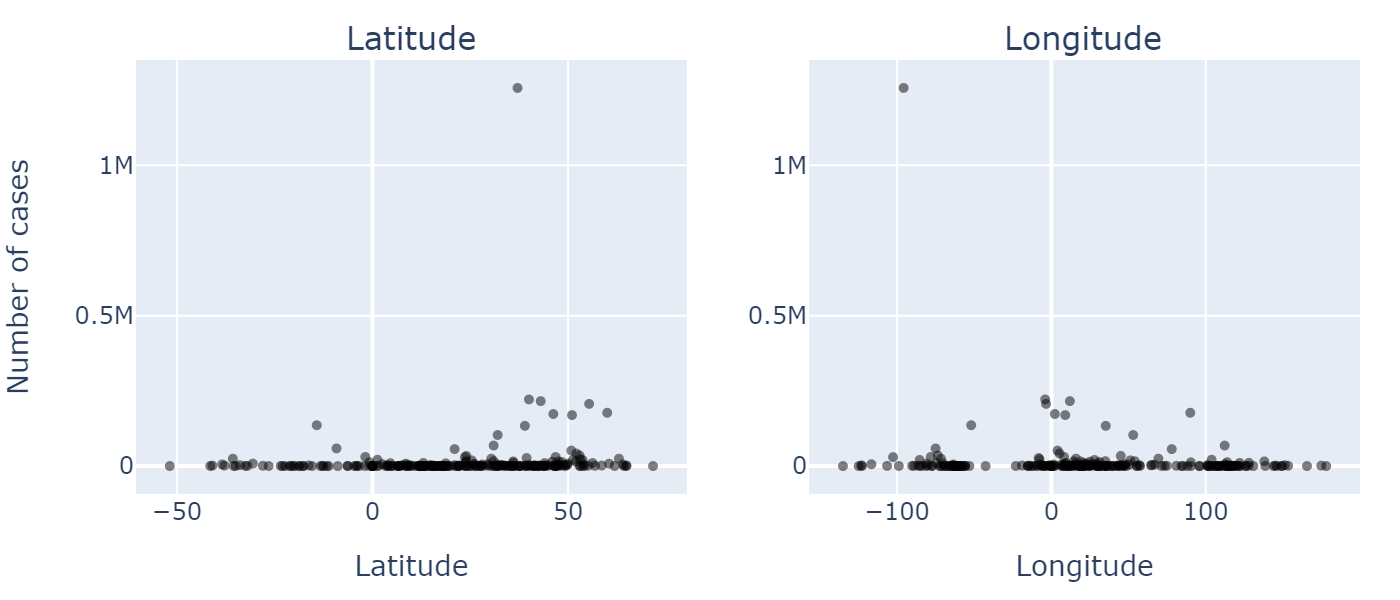

In [13]:
# Now let's split latitude and longitude
matrix_num_case = global_case.drop(columns=['Country', 'Province/State']).to_numpy()

# Plot the number of cases
fig = plotly.subplots.make_subplots(rows=1, cols=2, subplot_titles=("Latitude", "Longitude"))

fig.add_trace(go.Scatter(x=matrix_num_case[:, 0], y=matrix_num_case[:, -1], mode='markers', 
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='Black', width=0))),
              row=1, col=1)
fig.add_trace(go.Scatter(x=matrix_num_case[:, 1], y=matrix_num_case[:, -1], mode='markers',
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='Black', width=0))),
              row=1, col=2)              

fig.update_xaxes(title_text="Latitude", row=1, col=1)
fig.update_yaxes(title_text="Number of cases", row=1, col=1)
fig.update_xaxes(title_text="Longitude", row=1, col=2)
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20), height=300, showlegend=False)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

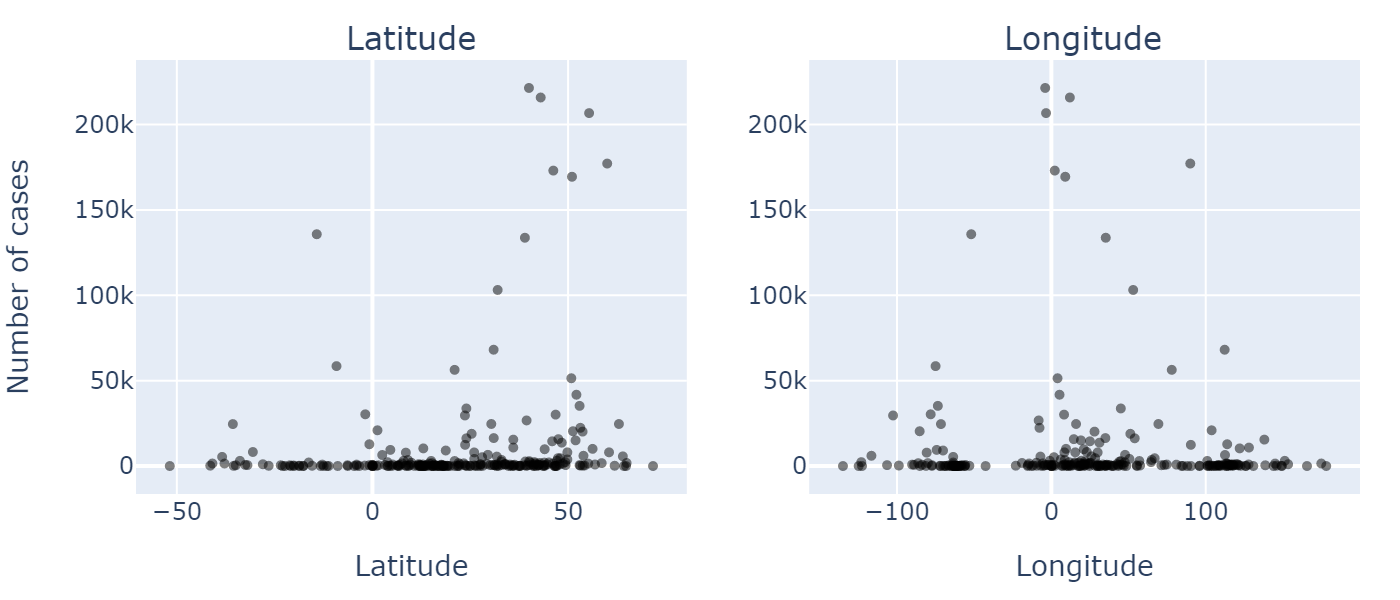

In [14]:
# Again, US is such a big outlier that we cannot see anything else
# Let's remove that big guy to look at the rest
global_case_dropUS = global_case[global_case['Country'] != 'US']
matrix_num_case = global_case_dropUS.drop(columns=['Country', 'Province/State']).to_numpy()

# Plot the number of cases
fig = plotly.subplots.make_subplots(rows=1, cols=2, subplot_titles=("Latitude", "Longitude"))

fig.add_trace(go.Scatter(x=matrix_num_case[:, 0], y=matrix_num_case[:, -1], mode='markers', 
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='Black', width=0))),
              row=1, col=1)
fig.add_trace(go.Scatter(x=matrix_num_case[:, 1], y=matrix_num_case[:, -1], mode='markers',
              marker=dict(color='Black', size=5, opacity=0.5, line=dict(color='Black', width=0))),
              row=1, col=2)              

fig.update_xaxes(title_text="Latitude", row=1, col=1)
fig.update_yaxes(title_text="Number of cases", row=1, col=1)
fig.update_xaxes(title_text="Longitude", row=1, col=2)
fig.update_layout(margin=dict(l=20, r=20, t=30, b=20), height=300, showlegend=False)

# Interactive plot
# fig.show()

# Static plot (for view on Github)
Image(pio.to_image(fig, format='png', scale=2))

**After removing US, it seems there are weak relations between latitude/longitude and number of cases. For latitude, countries that are higher up (larger latitude) tend to have more cases. For longitude, the high number of cases tend to cluster around 0, which is UK. So it seems like most cases are at European, developed countries.**

## Import external data about countries
Because we only have geographical location of countries for current dataset, we have to get external data for more features. Here I try population and GDP dataset from World Bank: https://data.worldbank.org/

In [49]:
# Load data
print('Beginning data loading ...')

# Data directory
dir_data = os.path.join(os.getcwd(), 'data')

# GDP
dir_GDP = os.path.join(dir_data, 'GDP_2018.csv')
GDP = pd.read_csv(dir_GDP)

# Population
dir_population = os.path.join(dir_data, 'Population_2018.csv')
population = pd.read_csv(dir_population)
    
print('Data loading finished!')

Beginning data loading ...
Data loading finished!


In [16]:
# Explore the data
GDP.head(n=2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.585657e+10,1.780428e+10,2.000162e+10,2.056105e+10,2.048487e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.936297e+10,NaN


In [17]:
population.head(n=2)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN


## Cleaning the data
The big problem is that some countries' names in COVID-19 data do not match those in GDP/Population data (e.g. 'US' in COVID-19 is 'United States' in GDP/Population).

So first I find the countries in GDP/Population that are not in COVID-19 using this code:

<pre><code> GDP_not_in_list = GDP[~GDP['Country Name'].isin(unique_country_name)]
list(GDP_not_in_list['Country Name']) </code></pre>

Note that some names in the list are not even countries but some groups (e.g. 'World', 'East Asia & Pacific').

Then I cross-checked each one in that list with the country list of COVID-19 and if I found a plausible match, I put that pairs into 2 lists 'replace_old' and 'replace_new'.

Using the list, I replace the country's names in GDP/Population table to match the names of COVID-19 data.

Finally, I select only countries in GDP/Population that match COVID-19 data.

In [50]:
# List of the same non-match countries
replace_old = ['Bahamas, The',
              'Brunei Darussalam',
              'Congo, Dem. Rep.',
               'Congo, Rep.',
               'Czech Republic',
               'Egypt, Arab Rep.',
               'Gambia, The', 
               'Iran, Islamic Rep.',
               'Kyrgyz Republic',
               'St. Kitts and Nevis',
               'Korea, Rep.',
               'Lao PDR',
               'St. Lucia',
               'Myanmar',
               'Russian Federation',
               'Slovak Republic',
               'Syrian Arab Republic',
               'United States',
               'St. Vincent and the Grenadines',
               'Venezuela, RB',
               'Yemen, Rep.'
              ]
replace_new = ['Bahamas',
              'Brunei',
              'Congo (Kinshasa)',
              'Congo (Brazzaville)',
              'Czechia',
              'Egypt',
              'Gambia',
              'Iran',
              'Kyrgyzstan',
              'Saint Kitts and Nevis',
              'Korea, South',
              'Laos',
              'Saint Lucia',
              'Burma',
              'Russia',
              'Slovakia',
              'Syria',
              'US',
              'Saint Vincent and the Grenadines',
              'Venezuela',
              'Yemen']

# Replace the name to match COVID-19 data
GDP.replace(replace_old, replace_new, inplace=True)
population.replace(replace_old, replace_new, inplace=True)

In [51]:
# Select only countries that match COVID-19 data
GDP = GDP[GDP['Country Name'].isin(unique_country_name)]
population = population[population['Country Name'].isin(unique_country_name)]

In [52]:
# Drop some columns that are not useful
GDP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', '2019'], inplace=True)
population.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', '2019'], inplace=True)

# Rename feature Country Name to Country to avoid headache later
GDP.rename(columns={'Country Name': 'Country_name'}, inplace=True)
population.rename(columns={'Country Name': 'Country_name'}, inplace=True)

In [53]:
# Display the top countries to see if our manipulation makes sense
GDP.sort_values(by='2018', ascending=False).head(5)

,Country_name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
249,US,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,8.150000e+11,8.617000e+11,9.425000e+11,...,1.444890e+13,1.499210e+13,1.554260e+13,1.619700e+13,1.678480e+13,1.752170e+13,1.821930e+13,1.870720e+13,1.948540e+13,2.054430e+13
38,China,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,7.672029e+10,7.288163e+10,7.084654e+10,...,5.101700e+12,6.087160e+12,7.551500e+12,8.532230e+12,9.570410e+12,1.043850e+13,1.101550e+13,1.113790e+13,1.214350e+13,1.360820e+13
117,Japan,4.430734e+10,5.350862e+10,6.072302e+10,6.949813e+10,8.174901e+10,9.095028e+10,1.056280e+11,1.237820e+11,1.466010e+11,...,5.231380e+12,5.700100e+12,6.157460e+12,6.203210e+12,5.155720e+12,4.850410e+12,4.389480e+12,4.926670e+12,4.859950e+12,4.971320e+12
53,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.397790e+12,3.396350e+12,3.744410e+12,3.527340e+12,3.732740e+12,3.883920e+12,3.360550e+12,3.466790e+12,3.656750e+12,3.947620e+12
79,United Kingdom,7.323397e+10,7.774197e+10,8.124756e+10,8.656196e+10,9.440756e+10,1.018250e+11,1.085730e+11,1.131170e+11,1.077600e+11,...,2.410910e+12,2.475240e+12,2.659310e+12,2.704890e+12,2.786020e+12,3.063800e+12,2.928590e+12,2.694280e+12,2.666230e+12,2.855300e+12


In [54]:
population.sort_values(by='2018', ascending=False).head(5)

,Country_name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
38,China,667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,735400000.0,754550000.0,774510000.0,...,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,1.378665e+09,1.386395e+09,1.392730e+09
107,India,450547679.0,459642165.0,469077190.0,478825608.0,488848135.0,499123324.0,509631500.0,520400576.0,531513824.0,...,1.217726e+09,1.234281e+09,1.250289e+09,1.265783e+09,1.280846e+09,1.295604e+09,1.310152e+09,1.324510e+09,1.338659e+09,1.352617e+09
249,US,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,196560000.0,198712000.0,200706000.0,...,3.067715e+08,3.093217e+08,3.115569e+08,3.138310e+08,3.159937e+08,3.183010e+08,3.206352e+08,3.229413e+08,3.249855e+08,3.266875e+08
104,Indonesia,87751068.0,90098394.0,92518377.0,95015297.0,97596733.0,100267062.0,103025426.0,105865571.0,108779924.0,...,2.386206e+08,2.418342e+08,2.451162e+08,2.484524e+08,2.518064e+08,2.551290e+08,2.583833e+08,2.615542e+08,2.646459e+08,2.676634e+08
182,Pakistan,44988690.0,46065231.0,47198878.0,48387301.0,49627623.0,50917975.0,52260189.0,53655789.0,55102684.0,...,1.755256e+08,1.794246e+08,1.833406e+08,1.872815e+08,1.912629e+08,1.953068e+08,1.994270e+08,2.036273e+08,2.078967e+08,2.122150e+08


## Check the imported data
Let's plot the GDP and population on the world map again to check if the data make sense and also to gain overal view of the data.

In [55]:
# First plot GDP
fig = go.Figure(data=go.Choropleth(
    locations=GDP["Country_name"], # Country names
    locationmode = 'country names', # set the mode to "country names"
    z = GDP["2018"].astype(float), # Data to be color-coded
    colorscale = 'Reds',
    colorbar_title = "GDP",
))

fig.update_layout(
    title_text = 'GDP of countries in 2018',
    margin=dict(l=20, r=20, t=30, b=20)
)

# Interactive plot
fig.show()

# Static plot (for view on Github)
# Image(pio.to_image(fig, format='png', scale=2))